In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
draft = pd.read_table("draft.txt", sep = '\t')

In [8]:
draft.index = draft.index + 1
draft = draft.reset_index()

Text(0, 0.5, 'Result')

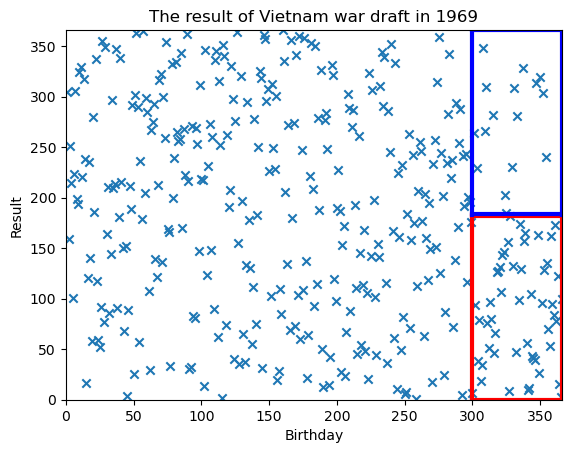

In [34]:
plt.scatter(data = draft, x = "index", y = "N69", marker = 'x')
plt.axhline(y = 182, xmin = 300/366, xmax = 1, color = 'red', lw  = 3)
plt.axhline(y = 184, xmin = 300/366, xmax = 1, color = 'blue', lw = 3)
plt.axhline(y = 0, xmin = 300/366, xmax = 1, color = 'red', lw  = 3)
plt.axhline(y = 366, xmin = 300/366, xmax = 1, color = 'blue', lw = 3)

plt.axvline(x = 300, ymin = 0, ymax= 0.5, color = 'red', lw  = 3)
plt.axvline(x = 366, ymin = 0, ymax= 0.5, color = 'red',lw  = 3)
plt.axvline(x = 300, ymin = 0.5, ymax= 1, color = 'blue',lw  = 3)
plt.axvline(x = 366, ymin = 0.5, ymax= 1, color = 'blue',lw  = 3)

plt.title("The result of Vietnam war draft in 1969")
plt.xlim(0,366)
plt.ylim(0,366)
plt.xlabel("Birthday")
plt.ylabel("Result")